In [1]:
import jax.numpy as jnp
from jax import random, grad, jit, random

In [5]:
import kagglehub
import matplotlib.pyplot as plt
import numpy as np

# path = kagglehub.dataset_download("hojjatk/mnist-dataset")  # download mnist
path = '/home/tibless/.cache/kagglehub/datasets/hojjatk/mnist-dataset/versions/1'
key = random.PRNGKey(42)
print(f'mnsit at: {path}')

mnsit at: /home/tibless/.cache/kagglehub/datasets/hojjatk/mnist-dataset/versions/1


In [6]:
# load mnist

import os
import struct
import numpy as np

def read_idx(filename):
    """
    Read MNIST data from file using idx format.

    Return
    ------
    np.ndarray
    """
    with open(filename, 'rb') as f:
        zero, data_type, dims = struct.unpack('>HBB', f.read(4))
        shape = tuple(struct.unpack('>I', f.read(4))[0] for d in range(dims))
        return np.frombuffer(f.read(), dtype=np.uint8).reshape(shape)

TRAIN = 60000
TEST  = 10000
train_images = read_idx(os.path.join(path, 'train-images.idx3-ubyte'))[:TRAIN]
train_labels = read_idx(os.path.join(path, 'train-labels.idx1-ubyte'))[:TRAIN]
test_images = read_idx(os.path.join(path, 't10k-images.idx3-ubyte'))[:TEST]
test_labels = read_idx(os.path.join(path, 't10k-labels.idx1-ubyte'))[:TEST]

shuffle_kernel = np.random.permutation(np.arange(TRAIN))
train_images = train_images[shuffle_kernel]
train_labels = train_labels[shuffle_kernel]

print("训练图像数据大小: ", train_images.shape)
print("训练标签数据大小: ", train_labels.shape)
print("测试图像数据大小: ", test_images.shape)
print("测试标签数据大小: ", test_labels.shape)

训练图像数据大小:  (60000, 28, 28)
训练标签数据大小:  (60000,)
测试图像数据大小:  (10000, 28, 28)
测试标签数据大小:  (10000,)


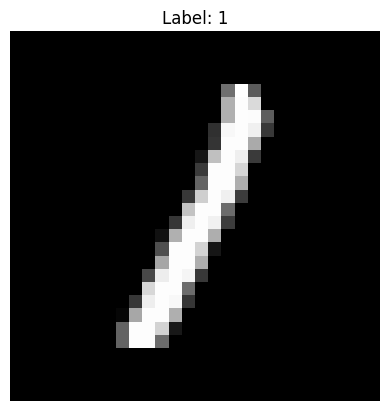

In [7]:
ix = 4
plt.imshow(train_images[ix], cmap='gray')
plt.title(f"Label: {train_labels[ix]}")
plt.axis('off')  # 不显示坐标轴
plt.show()

In [8]:
X_train = jnp.array(train_images.reshape(train_images.shape[0], -1)) / 255.  # normalization to accelerate training & convergency
y_train = jnp.array(train_labels)
X_test = jnp.array(test_images.reshape(test_images.shape[0], -1)) / 255.
y_test = jnp.array(test_labels)

def one_hot(y: jnp.ndarray, num_class: int):
    res = jnp.zeros((y.shape[0], num_class))
    res = res.at[jnp.arange(y.shape[0]), y].set(1)
    return res

y_train_one_hot = one_hot(y_train, 10)
y_test_one_hot = one_hot(y_test, 10)